In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:

##loading the image 
img = cv2.imread('Images/ss.jpg')

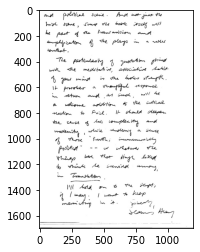

In [4]:
plt.imshow(img)


In [5]:
##converting the image to grayscale using inbuild function
img_grayscale = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

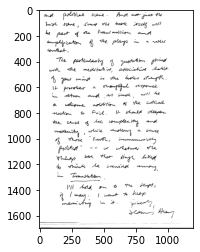

In [6]:
plt.imshow(img_grayscale/255.0,cmap='gray')

In [18]:
cv2.imshow('Gray',img_grayscale)
cv2.waitKey(0)

-1

In [8]:

##simplae binary threholding
threshold, thresh_inv = cv2.threshold(img_grayscale,150,255,cv2.THRESH_BINARY_INV)
cv2.imshow('Simple Thresholded Inverse',thresh_inv)
cv2.waitKey(0)

-1

In [19]:
##adaptive thresholding
adavtipe_thresh = cv2.adaptiveThreshold(img_grayscale, 255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY_INV,11,3)
cv2.imshow('AdaptiveThresholding', adavtipe_thresh)
cv2.waitKey(0)

-1

In [11]:

##finding the sum along the horizontal of each row and saving it in an array
horizontal_hist = np.sum(adavtipe_thresh,axis=1)/255
##checking the length of array
len(horizontal_hist)

1696

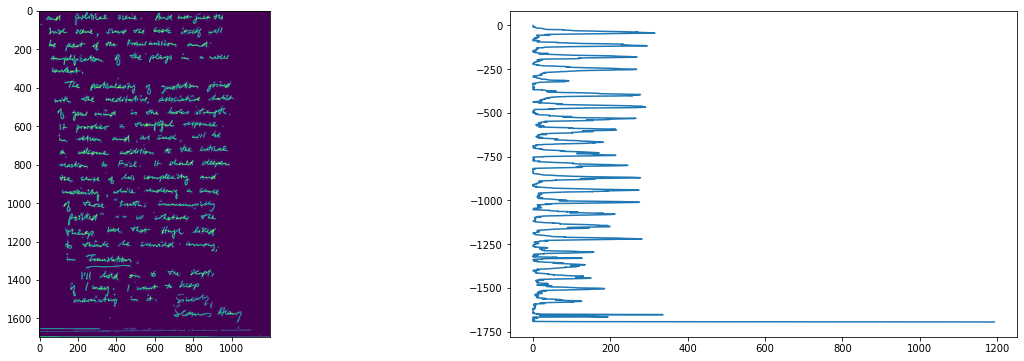

In [12]:

fig = plt.figure()
##just random sets of values to get the figure dimension right
fig.set_figheight(6)
fig.set_figwidth(20)

##making subplot right to visualize properly side by side
ax1 = fig.add_subplot(121)

ax2 = fig.add_subplot(122)

ax1.imshow(adavtipe_thresh)
x = np.arange(len(horizontal_hist))
##this plot is rotated by 90 cause the original plot could not be properly compared with the image
ax2.plot(horizontal_hist,-x)
plt.show()

In [13]:
##just to check what is the minium value of sum of pixel intensity in gap
np.min(horizontal_hist)

0.0

In [14]:
def line_extractor(new_img_array,new_hist):             ##this function extracts the line and removes the extracted line from the main image
    new_arr = []                                        ##to store the extracted line
    counter = 0 
    for i in new_hist:
        if i != 0:                                      ##keep extracting the line unless you get empty lines
            new_arr.append(new_img_array[counter])
            
        else:
            for i in range(counter):
                new_img_array = np.delete(new_img_array,0,0)        ##deleting the top row of the img array for each iteration until the counter runs out
                new_hist = np.delete(new_hist,0,)                  ##also the equivalent amount of rows need to be delted from histogram array
            break
            
        counter +=1                                                 ##counting the number of rows of array we have extracted
    new_arr = np.array(new_arr)
    # print(new_arr.shape)
    return new_arr,new_img_array,new_hist
    
        


def line_gap_remover(img_array,gap_counter,new_hist):               ##removes the gaps between the lines
    for i in range(gap_counter):
        img_array = np.delete(img_array,0,0)                        ##delete the top row of img array for each iteration until the gap_counter runs out
        new_hist = np.delete(new_hist,0,)                          ##adjusting the histogram array accordingly
    return img_array,new_hist



In [15]:

def image_segmentaion(img_array,hist):                          ##the main segmentation function
    while(True):                                                ##this is true as long as there is an image array
        gap_counter =0                                          #initialize the gap_counter to be zero initally before each new iteration of line segmentation
        for i in horizontal_hist:
            
            if i==0:                                        
                gap_counter +=1
            else:
                break                                           ##break out of the for loop as soon as we encounter a line
        # print(gap_counter)
        # print(hist.shape)
        new_img_array, new_hist = line_gap_remover(img_array,gap_counter,hist)      ##remove the gap first and readjust the img_array and hist array
        # print(new_img_array[0])
        # print(new_img_array.shape)
        # print(new_hist.shape)
        temp_line_array,new_img_array,new_hist = line_extractor(new_img_array,new_hist)     ##extract the line and readjut accordingly
        plt.imshow(temp_line_array)
        print(temp_line_array.shape)
        break
    

In [16]:
img_array = adavtipe_thresh
hist = horizontal_hist


(72, 1200)


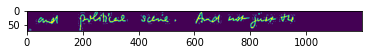

In [17]:
image_segmentaion(img_array,hist)

In [21]:
horizontal_hist.shape

(1696,)